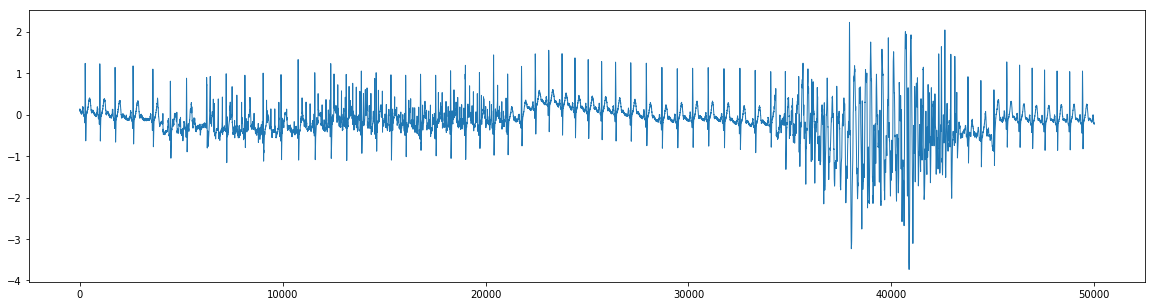

In [2]:
from rr import RR, load_data
import matplotlib
import matplotlib.pyplot as plt


data = load_data(file_path="simulation.txt", val_delimiter="\t", drop_first_col=True)[60000:110000]
sample_rate = 1000
min_bpm=30
max_bpm=240
qrs_time=0.1
ignore_wrong_areas=False
plot=True
rr = RR(data=data, sample_rate=sample_rate, min_bpm=min_bpm, max_bpm=max_bpm, qrs_time=qrs_time)

plt.figure(figsize=(20,5))
plt.plot(data, linewidth=1)

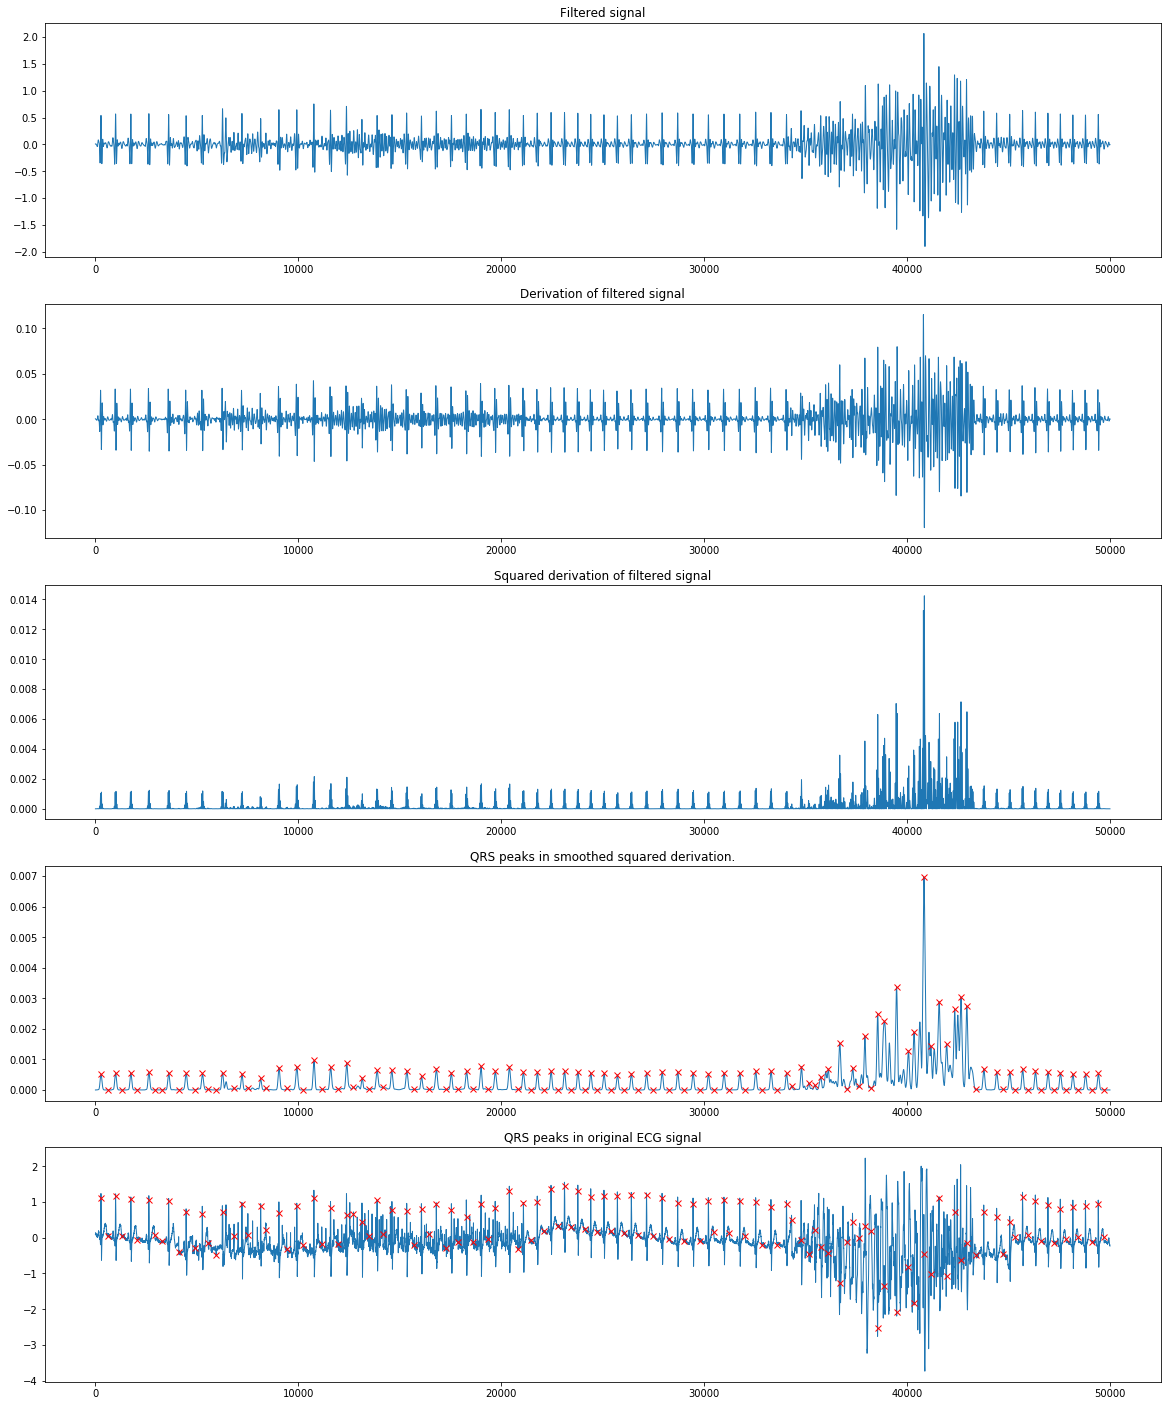

In [3]:
matplotlib.rcParams['figure.figsize'] = (20.0, 25.0)
qrs_peaks, smooth_squared_diff = rr.findQRSPeaks(plot=plot)

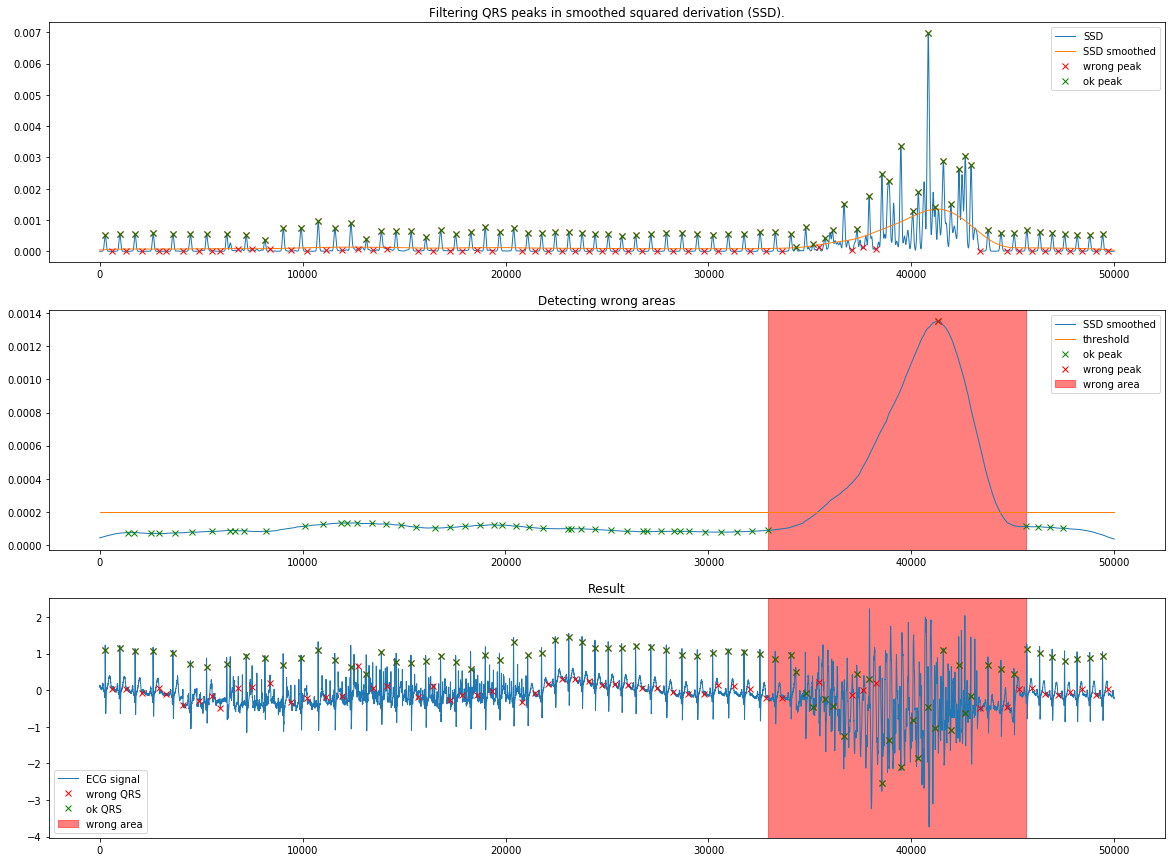

In [4]:
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
qrs_peaks, wrong_areas = rr.removeQRSPeaksOutliers(qrs_peaks, smooth_squared_diff, plot=plot)

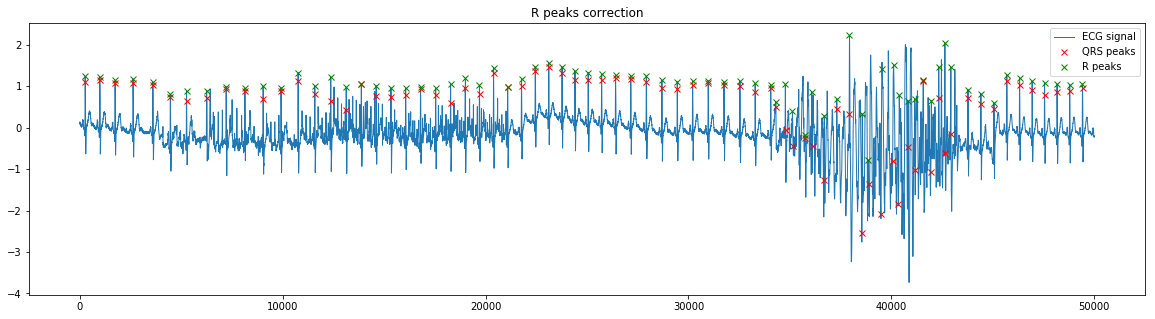

In [5]:
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)
r_peaks = rr.findRPeaks(qrs_peaks, plot=plot)

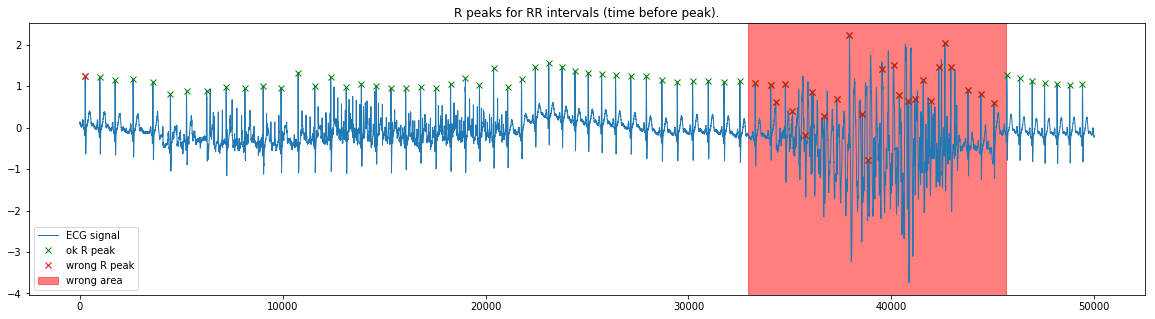

In [6]:
nn_intervals, num_wrong_area_peaks = rr.getNNintervals(r_peaks, wrong_areas, ignore_wrong_areas=ignore_wrong_areas, plot=plot)
